# Analysis of WSPs for quantifying hardness

## Setting Up Imports

In [19]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]

print("Number of optimatlly solved instances: ", df["opt_len"].isna().sum())

df

Number of optimatlly solved instances:  57


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp5_len,wsp_count_2.0,ls_len,ls_q_len,wsp/point
name,,,,,,,,,,
a280,280,2.586770e+03,3.161004e+03,4.847061e+03,NaN,NaN,2571,2769.255661,2956.917525,9.182143
ara238025,238025,NaN,7.591498e+05,1.176390e+06,NaN,NaN,3032365,NaN,NaN,12.739691
bby34656,34656,NaN,1.253833e+05,1.966541e+05,NaN,NaN,412676,NaN,NaN,11.907779
bbz25234,25234,NaN,8.772034e+04,1.414553e+05,NaN,NaN,299703,NaN,NaN,11.876952
bch2762,2762,NaN,1.073362e+04,1.624823e+04,NaN,NaN,28611,NaN,NaN,10.358798
...,...,...,...,...,...,...,...,...,...,...
pareja160K,160000,7.624870e+06,9.086707e+06,1.673396e+09,NaN,NaN,2966866,NaN,NaN,18.542912
courbet180K,180000,7.894985e+06,9.407409e+06,1.868348e+09,NaN,NaN,3440440,NaN,NaN,19.113556
earring200K,200000,8.178053e+06,9.762381e+06,2.188609e+09,NaN,NaN,3831148,NaN,NaN,19.15574


## Calculating and Plotting global WSP density

208


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              5376.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                   4.53e-150
Time:                        04:05:52   Log-Likelihood:                         -2827.1
No. Observations:                 208   AIC:                                      5656.
Df Residuals:                     207   BIC:                                      5660.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    13.7741      0.188     73.319      0.000      13.404      14.144
==============================================================================
Omnibus:                      100.507   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6312.286
Skew:                           0.913   Prob(JB):                         0.00
Kurtosis:                      29.926   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

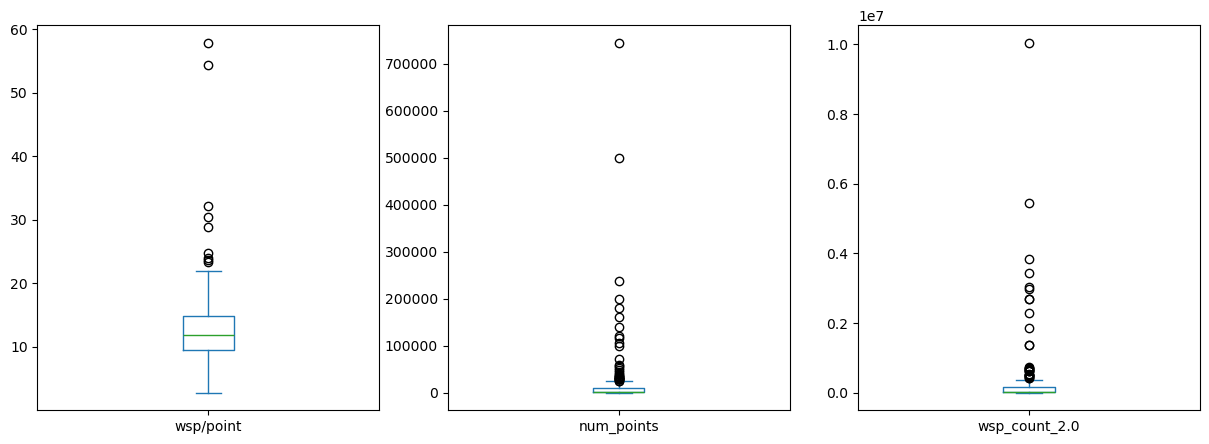

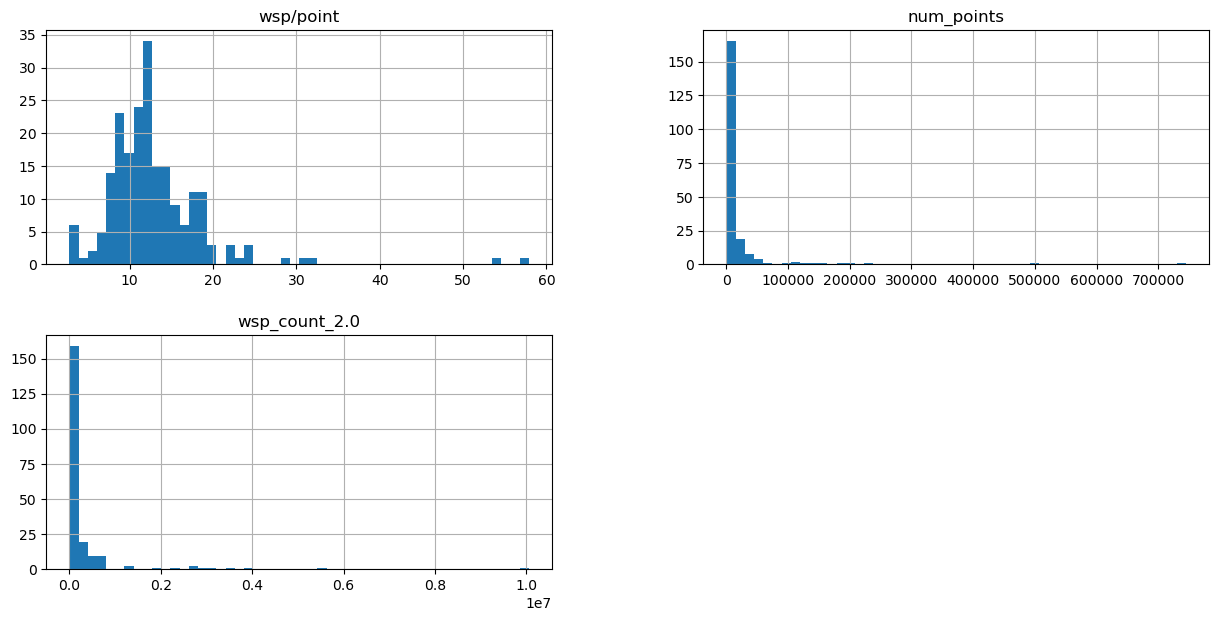

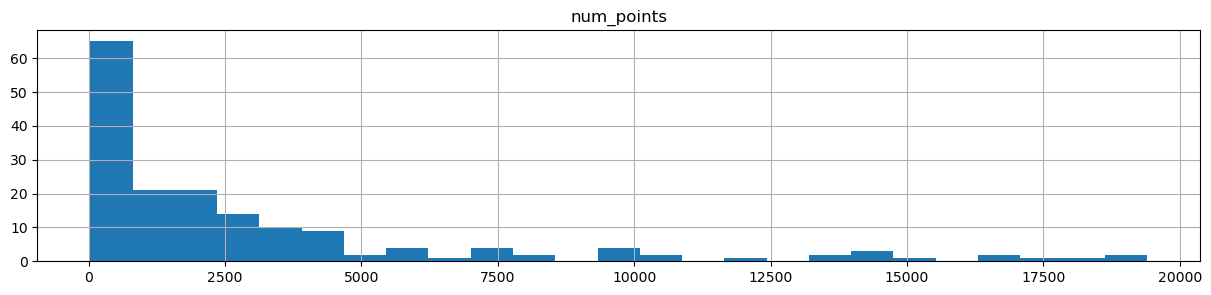

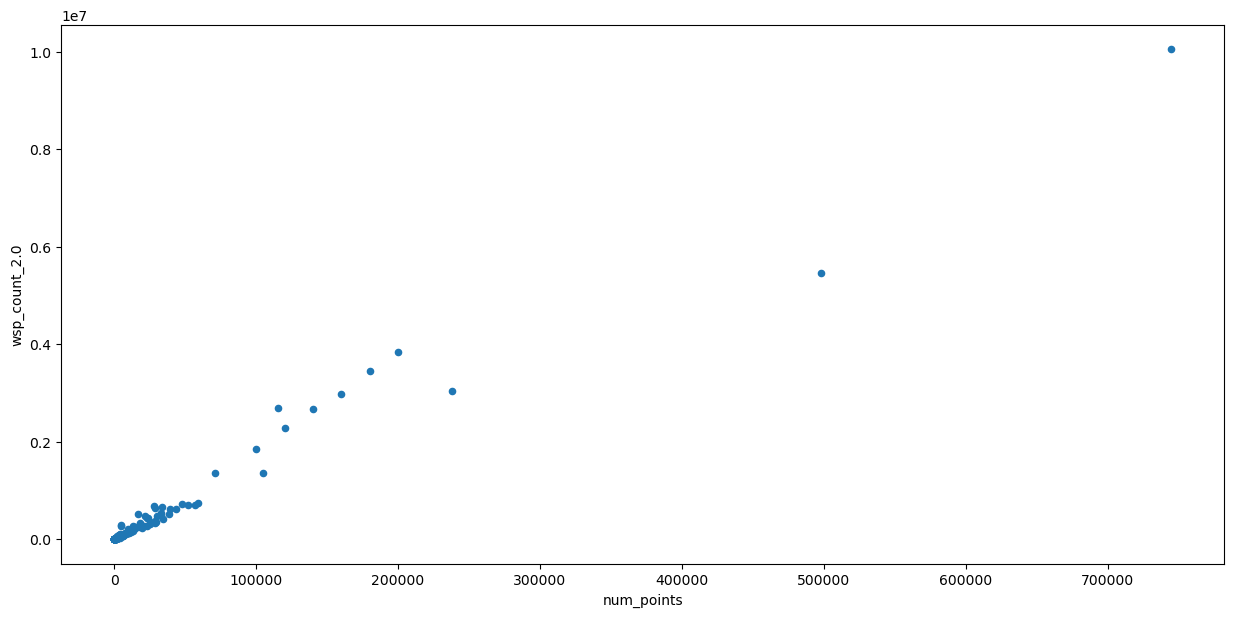

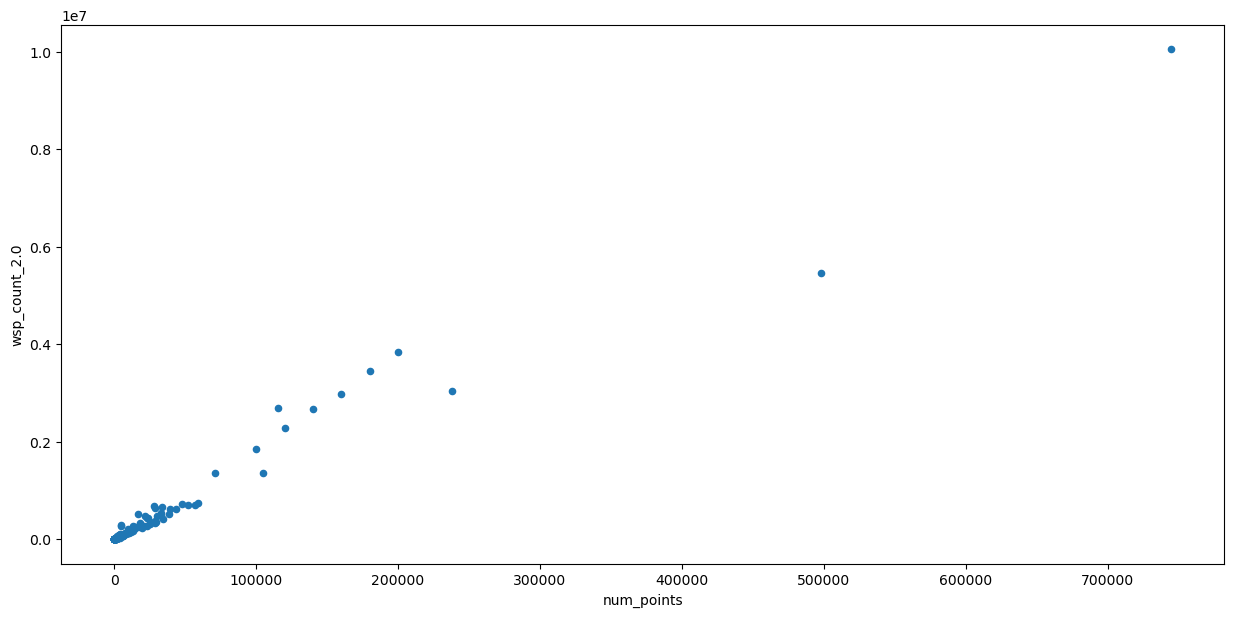

In [20]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_2.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))
df[df["num_points"] < 20000].hist(column=["num_points"], bins=25, figsize=(15,3))

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7)) # TODO: make this graph look better

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7),) # TODO: make this graph look better

results = sm.OLS(df["wsp_count_2.0"].astype(int), df["num_points"].astype(int)).fit()
results.summary()

## Remove problems which don't have a optimum (or near optimum) solution

In [21]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

## Calculate the error for each algorithm to the optimum (or near optimum)

In [22]:
df["nn error"] = df["nn_len"] / df["opt_len"]
df['ls error'] = df["ls_len"] / df["opt_len"]
df["lsq error"] = df["ls_q_len"] / df["opt_len"]
print(len(df))
df["num_points"].describe()

151


/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_19164/806009762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nn error"] = df["nn_len"] / df["opt_len"]
/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_19164/806009762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ls error'] = df["ls_len"] / df["opt_len"]
/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_19164/806009762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

count           151.0
mean     10762.960265
std      31638.165226
min              29.0
25%             272.0
50%            1389.0
75%            5924.5
max          200000.0
Name: num_points, dtype: Float64

## Plot analysis of WSPs hardness wrt. nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1003.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    2.62e-68
Time:                        04:06:01   Log-Likelihood:                         -94.149
No. Observations:                 151   AIC:                                      190.3
Df Residuals:                     150   BIC:                                      193.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0908      0.003     31.667      0.000       0.085       0.096
==============================================================================
Omnibus:                       33.548   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.124
Skew:                          -1.028   Prob(JB):                     3.24e-14
Kurtosis:                       5.377   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

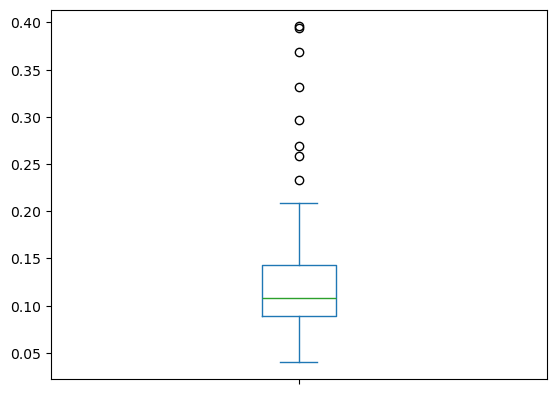

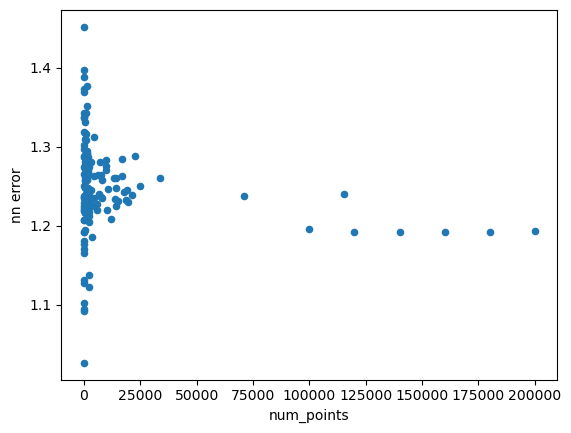

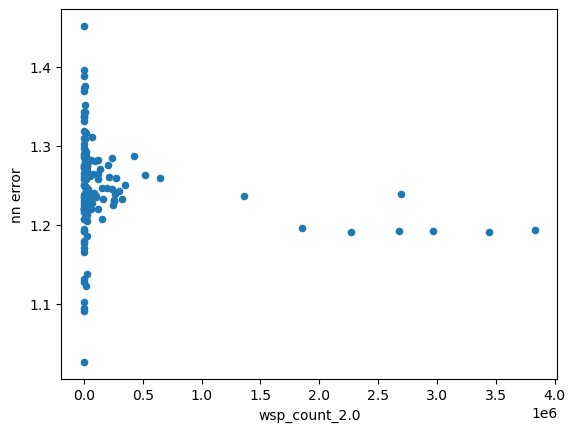

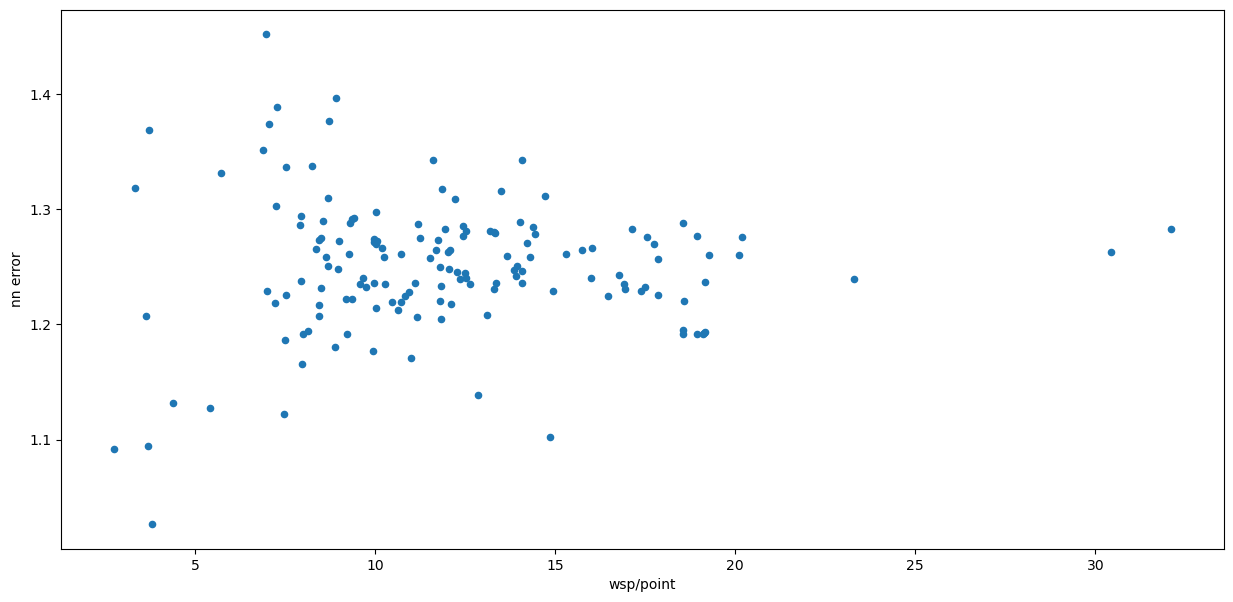

In [23]:
# df = df.drop("dj38") # outlier screws up how graph renders r^2 is 0.88 w/o them
# df = df.drop("dkd1973")

(df["nn error"] / df["wsp/point"]).plot.box()

df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
fig, ax = plt.subplots(figsize=(15,7))
df.plot.scatter("wsp/point", "nn error", ax=ax)

# for k, v in df.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
results.summary()

## Plot analysis of WSPs hardness wrt. local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ls error   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              532.4
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    1.93e-34
Time:                        04:08:08   Log-Likelihood:                         -29.649
No. Observations:                  71   AIC:                                      61.30
Df Residuals:                      70   BIC:                                      63.56
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.0981      0.004     23.075      0.000       0.090       0.107
==============================================================================
Omnibus:                        5.905   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.182
Skew:                          -0.637   Prob(JB):                       0.0749
Kurtosis:                       3.357   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

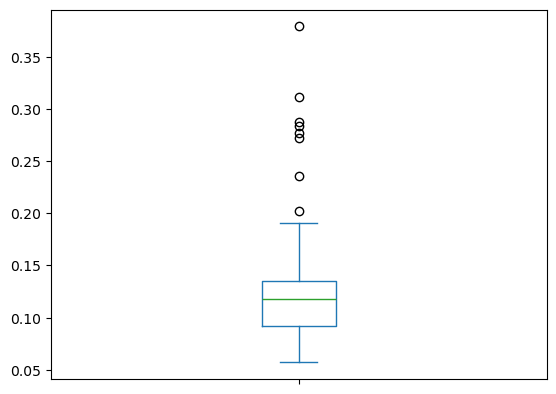

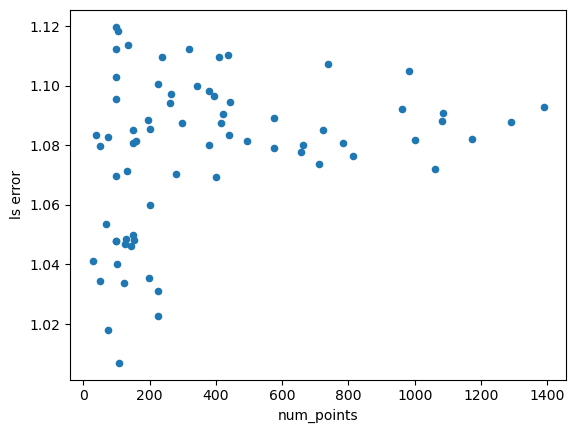

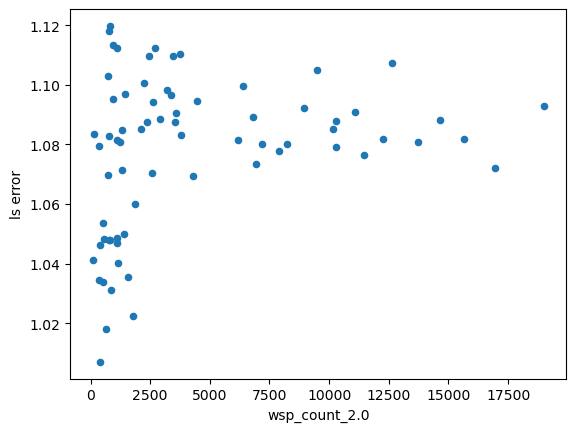

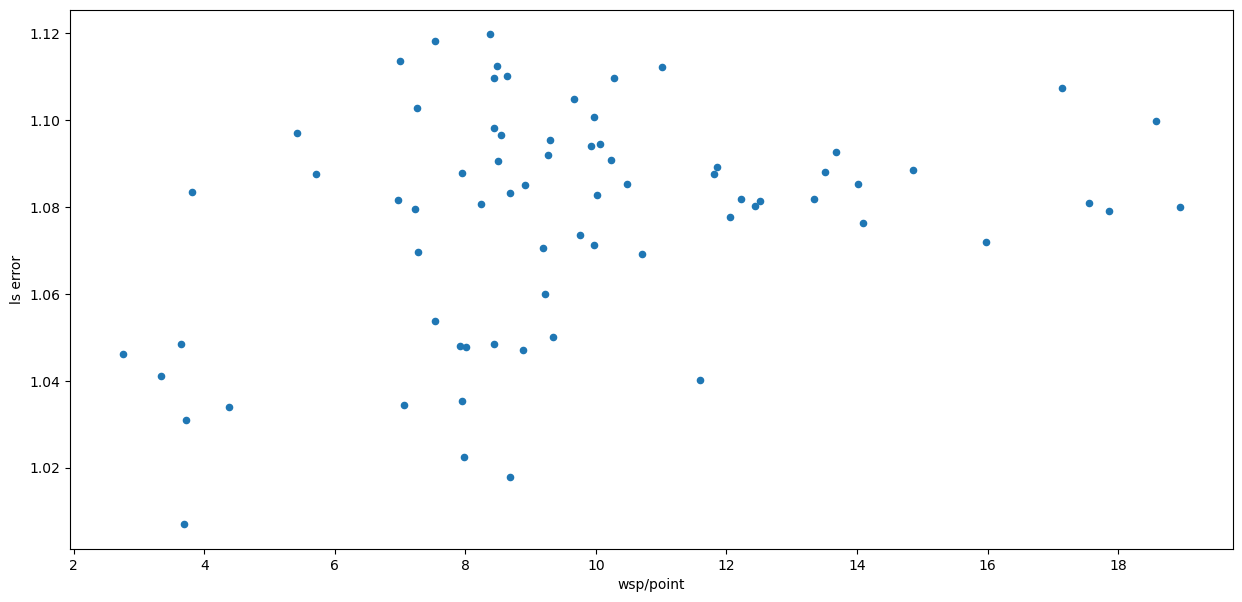

In [24]:
dfs = df[~df['ls_len'].isna()] # remove problems without optimal lens

(dfs["ls error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "ls error")
dfs.plot.scatter("wsp_count_2.0", "ls error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "ls error", ax=ax)

# for k, v in dfs.iterrows():
#     ax.annotate(k, (v["wsp/point"], v["nn error"]))

results = sm.OLS(dfs["ls error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()

## Plot analysis of WSPs hardness wrt. quick local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              536.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    1.49e-34
Time:                        04:08:38   Log-Likelihood:                         -34.187
No. Observations:                  71   AIC:                                      70.37
Df Residuals:                      70   BIC:                                      72.64
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1050      0.005     23.170      0.000       0.096       0.114
==============================================================================
Omnibus:                        5.698   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.067
Skew:                          -0.641   Prob(JB):                       0.0794
Kurtosis:                       3.261   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

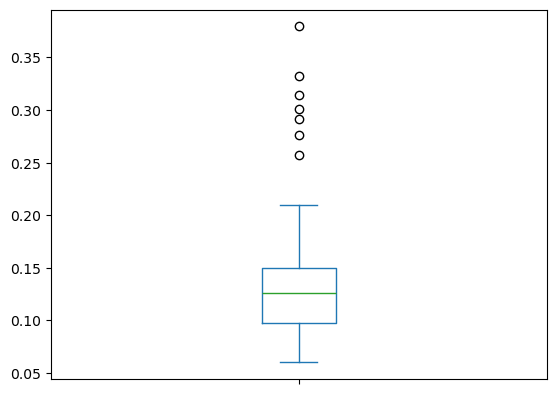

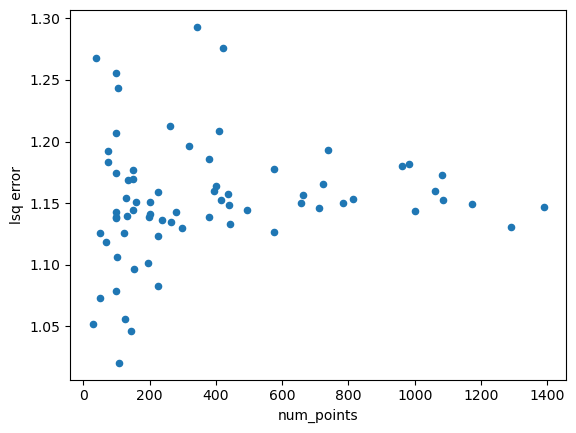

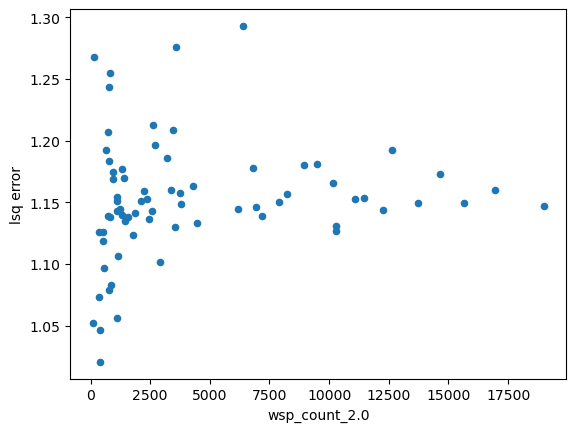

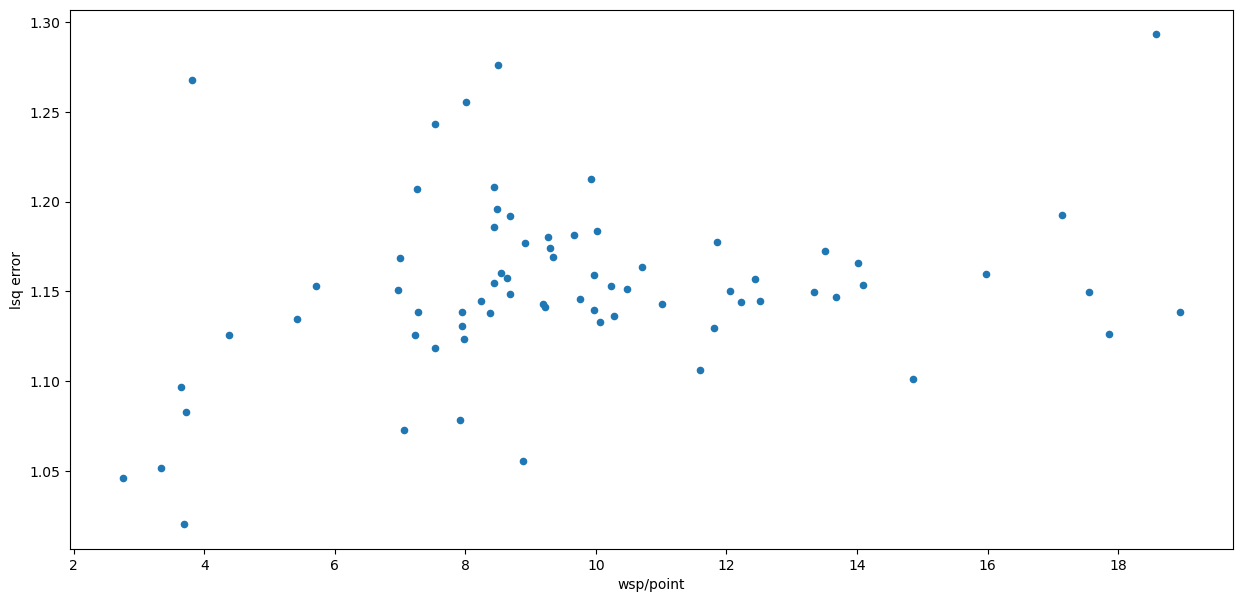

In [25]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              536.9
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                    1.49e-34
Time:                        04:09:00   Log-Likelihood:                         -34.187
No. Observations:                  71   AIC:                                      70.37
Df Residuals:                      70   BIC:                                      72.64
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1050      0.005     23.170      0.000       0.096       0.114
==============================================================================
Omnibus:                        5.698   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                5.067
Skew:                          -0.641   Prob(JB):                       0.0794
Kurtosis:                       3.261   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

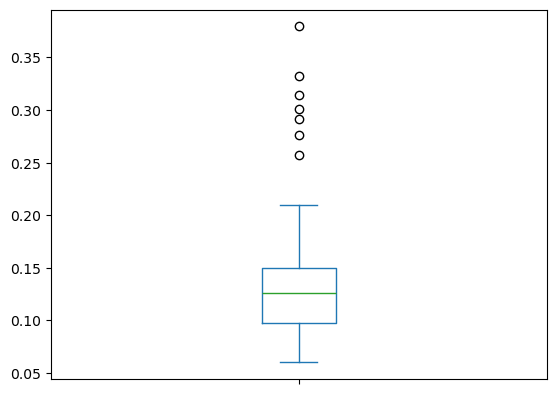

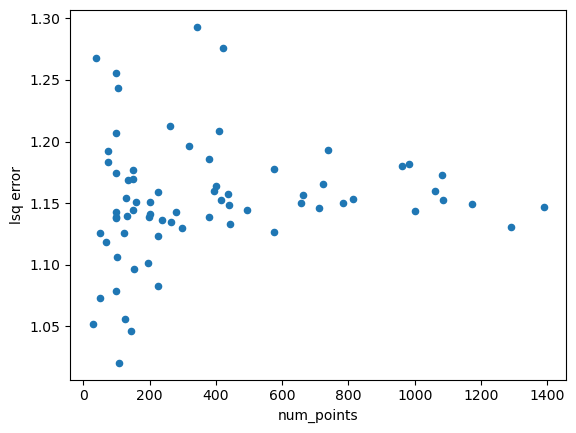

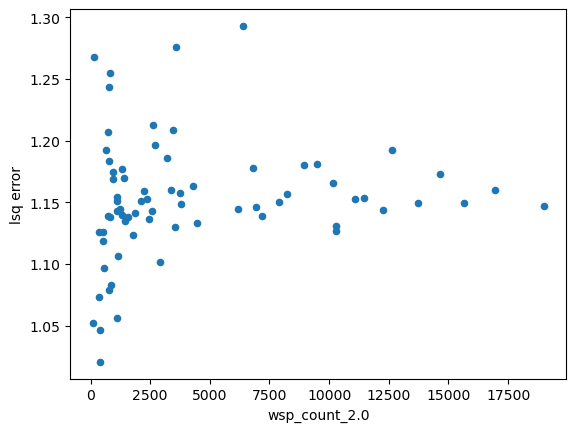

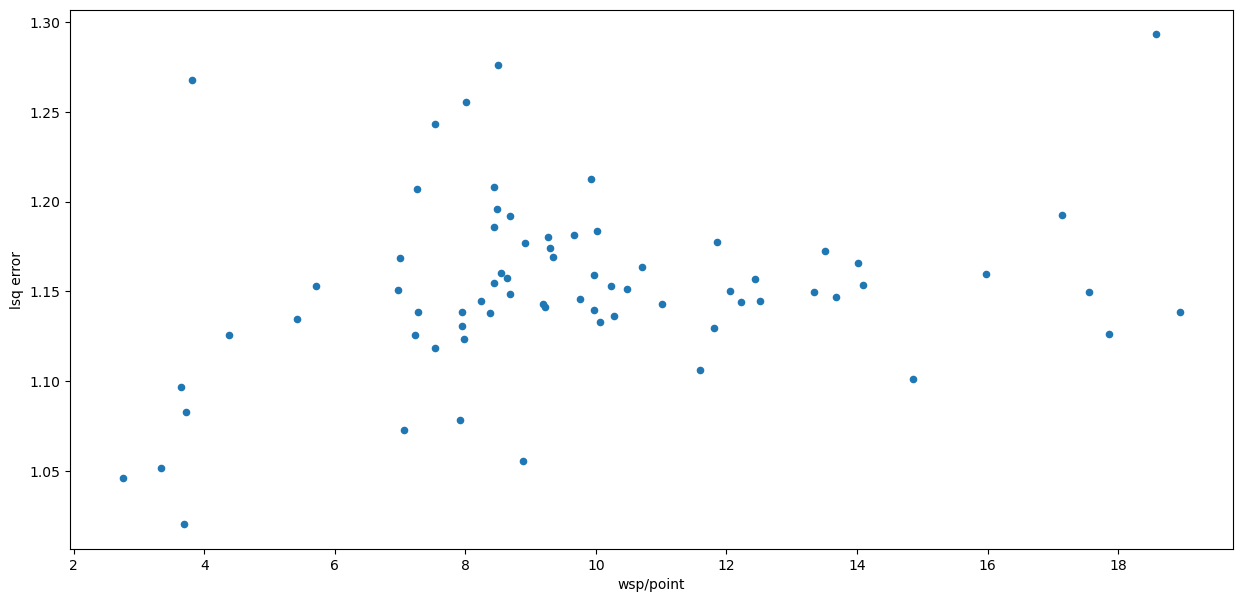

In [26]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp/point"].astype(float)).fit()
results.summary()